<a href="https://colab.research.google.com/github/Donets-Yuliya/DataScience/blob/main/HomeWork5/HomeWork5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

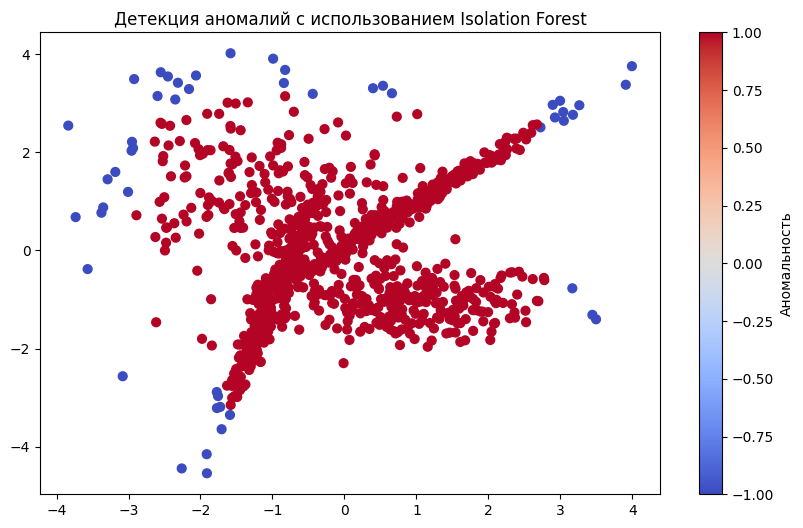

Матрица ошибок:
[[  0   0   0]
 [ 12   0 486]
 [ 38   0 464]]
Отчет о классификации:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       498
           1       0.49      0.92      0.64       502

    accuracy                           0.46      1000
   macro avg       0.16      0.31      0.21      1000
weighted avg       0.25      0.46      0.32      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [1]:
# Рассмотрим пример из практики, чтобы понять, почему получаем такую матрицу ошибок и отчет о классификации
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report

# Генерируем искусственные данные
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
# n_samples - Количество образцов (наблюдений)
# n_features - Общее количество признаков (и информативных, и неинформативных, и дублирующихся)
# n_informative - Количество информативных признаков
# n_redundant - Количество избыточных признаков, которые содержат схожую с информативными информацию и не несут новую информацию (т.е. имеют высокую корреляцию с информативными признаками и являются излишними)

# Создаем модель леса деревьев для детекции аномалий
clf = IsolationForest(contamination=0.05, random_state=42)
# Здесь мы говорим, что среди нашей классификации есть 5% аномалий, в нашем случае это 50 наблюдений

# Обучаем модель на данных
clf.fit(X)

# Предсказываем аномалии
y_pred = clf.predict(X)

# Визуализация данных и аномалий
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', s=40)
# По оси x будет первый признак (0 колонка), по оси y - второй признак (1 колонка)
plt.colorbar(label='Аномальность')
plt.title('Детекция аномалий с использованием Isolation Forest')
plt.show()

# Оценка качества
conf_matrix = confusion_matrix(y, y_pred)
print("Матрица ошибок:")
print(conf_matrix)

report = classification_report(y, y_pred)
print("Отчет о классификации:")
print(report)

In [4]:
# Смотрим, что содержит y
print(y)

[1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1
 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0
 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0
 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0
 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1
 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1
 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1
 1 0 1 1 0 0 0 0 1 0 1 1 

In [2]:
# Смотрим, что содержит y_pred
print(y_pred)
# Тут мы видим ТОЛЬКО 1 и -1

[ 1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [30]:
# Считаем количество -1 в y_pred
count_el = 0

for element in y_pred:
  if element == -1:
    count_el += 1

print(f"Количество значений -1 в y_pred: {count_el}")
# Здесь можно увидеть, что количество -1 составляет 50 штук, т.е. y_pred содержит признак, является ли значение таргета (y) аномалией или нет.

Количество значений -1 в y_pred: 50


In [23]:
# Пробуем это проверить на примере нескольких точек
print(X[3])
print(X[13])

[-2.95744095  2.03364529]
[2.92513959 2.71196089]


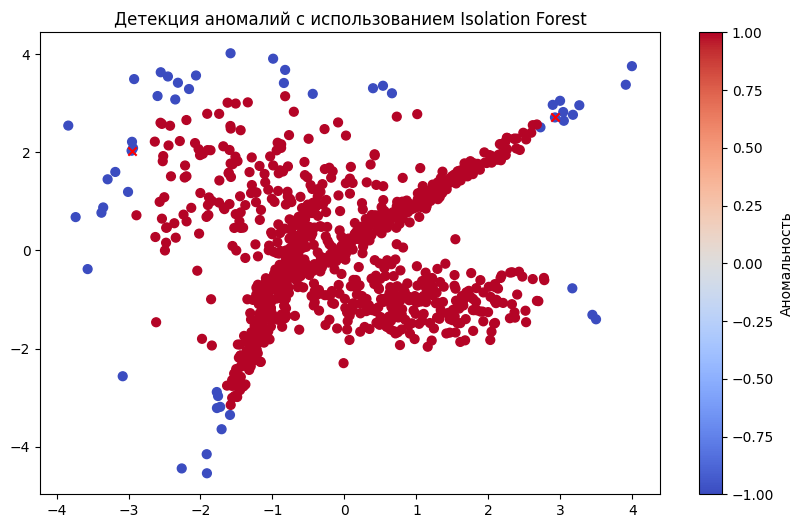

In [25]:
# Визуализация данных и аномалий
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', s=40)
plt.colorbar(label='Аномальность')
plt.title('Детекция аномалий с использованием Isolation Forest')

# Выделяем крестиками выбранные точки
plt.scatter(-2.95744095, 2.03364529, c='red', marker='x')
plt.scatter(2.92513959, 2.71196089, c='red', marker='x')

plt.show()
# Отметились именно точки аномалий, что и ожидалось

In [29]:
# Считаем количество единиц, которые определились как аномалии
mask = (y == 1) & (y_pred == -1)

# Суммируем значения в маске (True = 1, False = 0), чтобы получить количество.
count = np.sum(mask)

print(f"Количество значений 1, которые определились как аномалии: {count}")

Количество значений 1, которые определились как аномалии: 38


In [27]:
# Рассмотрим отчет о классификации
report = classification_report(y, y_pred)
print("Отчет о классификации:")
print(report)
# Объясняю, как получились такие значения.
# -1 - это значение аномалий из y_pred, которого нет в исходном y, соответственно его нет как "класс", но оно есть как "предсказанное" значение, поэтому попадает в отчет с 0 в precision, recall, f1-score, support
# 0 - есть в исходном y, но в y_pred нет ни одного значения 0, поэтому получаем 0 в precision, recall, f1-score
# 1 - это значение есть и в y, и в y_pred, поэтому можно посчитать, как получились такие значения precision и recall:
# precision - показывает, сколько единиц из y_pred является верно определенными единицами из y. Считаем по формуле: (502 - 38) / (1000 - 50)) = 0,488421,
#             где 502 - количество всех единиц в y; 38 - количество единиц в y, определенное как -1 в y_pred; 1000 - количество всех наблюдений; 50 - количество всех -1 в y_pred.
# recall - показывает, сколько единиц из y было верно определено в y_pred как единицы. Считаем по формуле: (502 - 38) / 502 = 0,9243,
#          где 502 - количество всех единиц в y; 38 - количество единиц в y, определенное как -1 в y_pred.

# Выводы: в данном случае НЕЛЬЗЯ сравнивать y и y_pred, т.к. они содержат разного рода информацию: y - классы, y_pred - признаки хороших данных и аномалий.

Отчет о классификации:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       498
           1       0.49      0.92      0.64       502

    accuracy                           0.46      1000
   macro avg       0.16      0.31      0.21      1000
weighted avg       0.25      0.46      0.32      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [32]:
# Считаем количество нолей, которые определились как аномалии
mask = (y == 0) & (y_pred == -1)

# Суммируем значения в маске (True = 1, False = 0), чтобы получить количество.
count = np.sum(mask)

print(f"Количество значений 0, которые определились как аномалии: {count}")

Количество значений 0, которые определились как аномалии: 12


In [31]:
# Рассмотрим Матрицу ошибок
# Оценка качества
conf_matrix = confusion_matrix(y, y_pred)
print("Матрица ошибок:")
print(conf_matrix)
# Объясняю, как получились такие значения.
# Первая строка и первый столбец - это значение -1 из y_pred, которого, как мы помним, нет в y, но раз оно есть в y_pred - попадает в матрицу.
# Вторая строка и второй столбец - это значение 0 из y.
# Третья строка и третий столбец - это значение 1 из y и y_pred.
# Значения 12 и 38 - это количество значений 0 и 1 из y, которые в y_pred определились как аномалии (-1)
# 486 - это количество нолей, которое в y_pred обозначается как хорошее значение (1). Можно рассчитать по формуле: 498 - 12 = 486,
#       где 498 - это количество всех 0 в y; 12 - количество значений 0, которые определились как аномалии в y_pred.
# 464 - это количество 1, которое в y_pred обозначилось как хорошее значение (1). Можно рассчитать по формуле: 502 - 38 = 464,
#       где 502 - это количество всех 1 в y; 38 - количество значений 1, которые определились как аномалии в y_pred.

# Вывод такой же, как в отчете о классификации: НЕЛЬЗЯ сравнивать y и y_pred, т.к. они содержат разного рода информацию: y - классы, y_pred - признаки хороших данных и аномалий.
# Т.е. проблема не в том, что нужно было разделить выборки на тренировочную и тестовую или что-нибудь подобное, а в сравнении того, что нельзя сравнивать между собой!

Матрица ошибок:
[[  0   0   0]
 [ 12   0 486]
 [ 38   0 464]]


Пример использования make_classification и IsolationForest

Accuracy: 0.9933
Precision: 0.9375
Recall: 0.9375
F1-Score: 0.9375
ROC-AUC: 0.9670
Average Precision: 0.8822
Матрица ошибок:
[[283   1]
 [  1  15]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       284
           1       0.94      0.94      0.94        16

    accuracy                           0.99       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.99      0.99      0.99       300



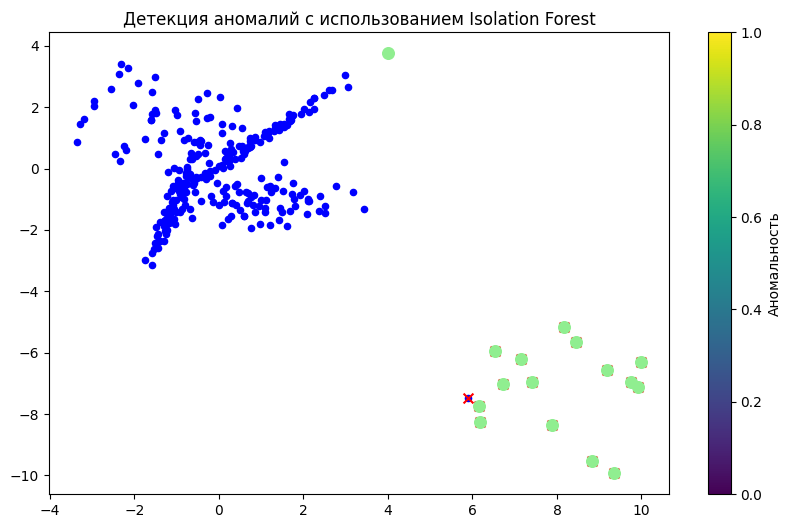

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# Генерируем искусственные данные
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Случайным образом меняем признаки для создания аномалий
n_anomalies = 50
anomaly_index = np.random.choice(len(y), n_anomalies, replace=False)  # Выбираем случайные индексы

for i in anomaly_index:
    #  Заменяем значения признаков на случайные числа из другого диапазона
    X[i, 0] = np.random.uniform(5, 10)
    X[i, 1] = np.random.uniform(-10, -5)

# Помечаем, какие значения являются аномалиями, а какие нет (по случайным индексам)
y_true_anomalies = np.zeros(len(y), dtype=int)
y_true_anomalies[anomaly_index] = 1

# Делим выборку на тренировочную и тестовую
X_train, X_test, y_train_anomalies, y_test_anomalies = train_test_split(X, y_true_anomalies, test_size=0.3, random_state=42)

# Создаем модель леса деревьев для детекции аномалий
clf = IsolationForest(contamination=0.05, random_state=42)

# Обучаем модель на данных
clf.fit(X_train)

# Предсказываем аномалии
y_pred = clf.predict(X_test)

# Для использования ROC-AUC, нам нужно преобразовать y_pred из {1, -1} в {0, 1}.
# Где 1 (нормальное) -> 0, и -1 (аномалия) -> 1
y_pred_anomalies = np.where(y_pred == 1, 0, 1)

accuracy = accuracy_score(y_test_anomalies, y_pred_anomalies)
precision = precision_score(y_test_anomalies, y_pred_anomalies, pos_label=1)
recall = recall_score(y_test_anomalies, y_pred_anomalies, pos_label=1)
f1 = f1_score(y_test_anomalies, y_pred_anomalies, pos_label=1)
roc_auc = roc_auc_score(y_test_anomalies, y_pred_anomalies)
avg_precision = average_precision_score(y_test_anomalies, y_pred_anomalies, pos_label=1)
conf_matrix = confusion_matrix(y_test_anomalies, y_pred_anomalies)
report = classification_report(y_test_anomalies, y_pred_anomalies)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
# Вот здесь уже можно посмотреть матрицу ошибок и отчет классификации
print("Матрица ошибок:")
print(conf_matrix)
print("Отчет о классификации:")
print(report)

# Визуализация данных и аномалий
plt.figure(figsize=(10, 6))
# Помечаем синим все точки X
plt.scatter(X_test[:, 0], X_test[:, 1], c='blue', s=20)

# Отмечаем x значения реальных аномалий
plt.scatter(X_test[y_test_anomalies == 1, 0], X_test[y_test_anomalies == 1, 1], c='red', marker='x', s=50)

# Поверх рисуем зелеными кругами предсказанные аномалии
plt.scatter(X_test[y_pred_anomalies == 1, 0], X_test[y_pred_anomalies == 1, 1], c='lightgreen', marker='o', facecolors='none', s=70)

plt.colorbar(label='Аномальность')
plt.title('Детекция аномалий с использованием Isolation Forest')
plt.show()